In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scms_df")

In [ ]:
df.head()

,id,project.code,pq,po.so,asn.dn,country,managed.by,fulfill.via,vendor.inco.term,shipment.mode,pq.first.sent.to.client.date,po.sent.to.vendor.date,scheduled.delivery.date,delivered.to.client.date,delivery.recorded.date,product.group,sub.classification,vendor,item.description,molecule.test.type,brand,dosage,dosage.form,unit.of.measure..per.pack.,line.item.quantity,line.item.value,pack.price,unit.price,manufacturing.site,first.line.designation,weight.kilograms,freight.cost.usd,line.item.insurance.usd,final
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN,13
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN,358
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN,171
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN,1855
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN,7590


In [ ]:
df.rename(columns=lambda x: x.strip().lower().replace(".", "_"), inplace=True)

In [ ]:
df["weight_kilograms_final"] = df["final"]

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            8817 non-null   int64  
 1   project_code                  8817 non-null   object 
 2   pq                            8817 non-null   object 
 3   po_so                         8817 non-null   object 
 4   asn_dn                        8817 non-null   object 
 5   country                       8817 non-null   object 
 6   managed_by                    8817 non-null   object 
 7   fulfill_via                   8817 non-null   object 
 8   vendor_inco_term              8817 non-null   object 
 9   shipment_mode                 8504 non-null   object 
 10  pq_first_sent_to_client_date  8817 non-null   object 
 11  po_sent_to_vendor_date        8817 non-null   object 
 12  scheduled_delivery_date       8817 non-null   object 
 13  del

country      product_group
Afghanistan  ANTM             AxesSubplot(0.125,0.125;0.775x0.755)
Angola       ARV              AxesSubplot(0.125,0.125;0.775x0.755)
             HRDT             AxesSubplot(0.125,0.125;0.775x0.755)
Benin        ARV              AxesSubplot(0.125,0.125;0.775x0.755)
             HRDT             AxesSubplot(0.125,0.125;0.775x0.755)
                                              ...                 
Vietnam      ARV              AxesSubplot(0.125,0.125;0.775x0.755)
Zambia       ARV              AxesSubplot(0.125,0.125;0.775x0.755)
             HRDT             AxesSubplot(0.125,0.125;0.775x0.755)
Zimbabwe     ARV              AxesSubplot(0.125,0.125;0.775x0.755)
             HRDT             AxesSubplot(0.125,0.125;0.775x0.755)
Name: line_item_quantity, Length: 72, dtype: object

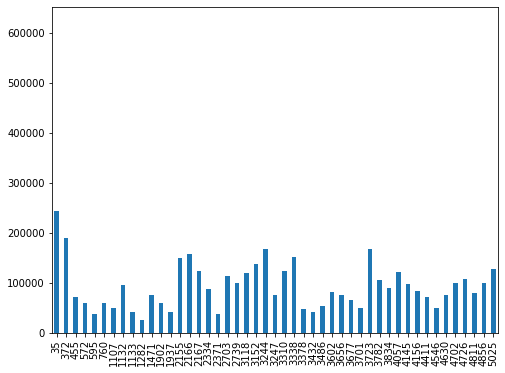

In [ ]:
df.groupby(["country","product_group"])['line_item_quantity'].plot.bar()

In [ ]:
df["scheduled_delivery_date"] = pd.to_datetime(df["scheduled_delivery_date"])
df["scheduled_delivery_date"]

0      2006-06-02
1      2006-11-14
2      2006-08-27
3      2006-09-01
4      2006-08-11
          ...    
8812   2015-06-30
8813   2015-07-31
8814   2015-07-31
8815   2015-07-31
8816   2015-09-09
Name: scheduled_delivery_date, Length: 8817, dtype: datetime64[ns]

In [ ]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap,geom_boxplot
from plotnine.data import mtcars

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


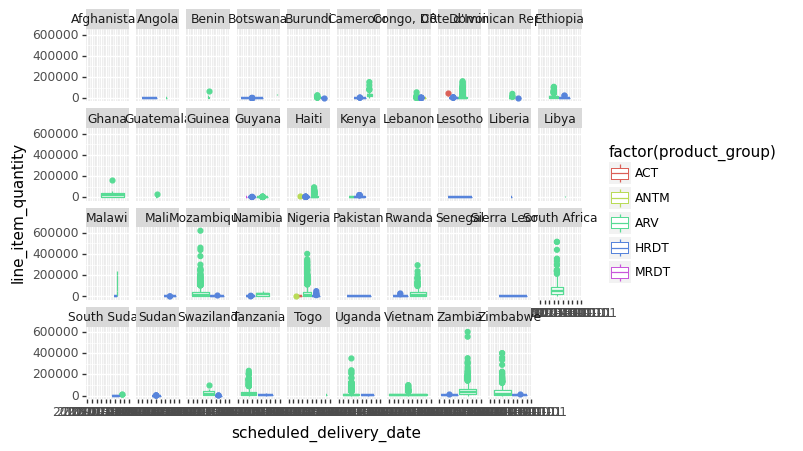

<ggplot: (8783909031495)>

In [ ]:
(ggplot(df, aes('scheduled_delivery_date', 'line_item_quantity', color='factor(product_group)'))
 + geom_boxplot()
 + facet_wrap('~country',nrow=4))


In [ ]:
date_time = pd.to_datetime(df.pop('scheduled_delivery_date'), format='%d.%m.%Y')

In [ ]:
df["date_time"] = date_time

In [ ]:
len(df)

8817

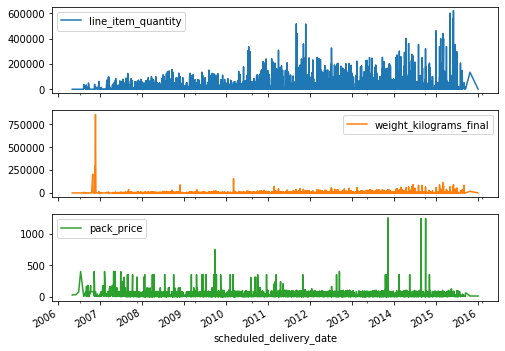

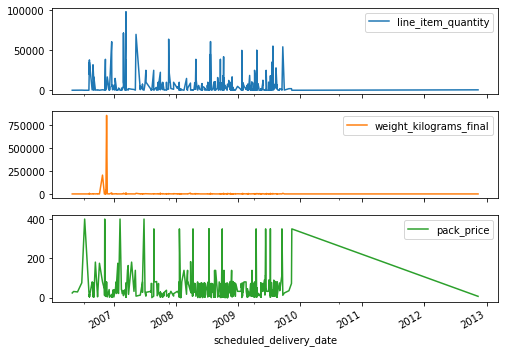

In [ ]:
plot_cols = ['line_item_quantity', 'weight_kilograms_final', 'pack_price']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
train_df

,id,project_code,pq,po_so,asn_dn,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,delivered_to_client_date,delivery_recorded_date,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure__per_pack_,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,line_item_insurance_usd,final,weight_kilograms_final,date_time
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN,13,13,2006-06-02
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN,358,358,2006-11-14
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN,171,171,2006-08-27
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN,1855,1855,2006-09-01
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN,7590,7590,2006-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6166,83520,104-CI-T30,FPQ-7659,SO-40121,DN-2304,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Air,5/3/2011,N/A - From RDC,12-Sep-11,12-Sep-11,ARV,Adult,SCMS from RDC,"Abacavir 300mg, tablets, 60 Tabs",Abacavir,Generic,300mg,Tablet,60,4617,69439.68,15.04,0.25,"Aurobindo Unit III, India",False,See DN-2304 (ID#:82395),See DN-2304 (ID#:82395),114.58,0,0,2011-09-27
6167,83521,106-HT-T30,FPQ-6801,SO-38213,DN-2310,Haiti,PMO - US,From RDC,N/A - From RDC,Air,12/14/2010,N/A - From RDC,11-Aug-11,11-Aug-11,ARV,Adult,SCMS from RDC,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,9200,21436.00,2.33,0.04,"Aurobindo Unit III, India",False,See DN-2310 (ID#:82968),See DN-2310 (ID#:82968),35.37,0,0,2011-07-19
6168,83522,114-UG-T30,FPQ-7267,SO-39060,DN-2312,Uganda,PMO - US,From RDC,N/A - From RDC,Truck,3/4/2011,N/A - From RDC,12-Aug-11,12-Aug-11,ARV,Adult,SCMS from RDC,Efavirenz/Emtricitabine/Tenofovir Disoproxil F...,Efavirenz/Emtricitabine/Tenofovir Disoproxil F...,Generic,600/200/300mg,Tablet - FDC,30,3330,66333.60,19.92,0.66,Mylan (formerly Matrix) Nashik,True,370,2886.12,109.45,370,370,2011-07-31
6169,83523,900-GH-T30,FPQ-7866,SO-40000,DN-2320,Ghana,PMO - US,From RDC,N/A - From RDC,Air,6/13/2011,N/A - From RDC,14-Nov-11,14-Nov-11,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,32168,265707.68,8.26,0.14,Mylan (formerly Matrix) Nashik,True,5199,585,438.42,5199,5199,2011-11-14


In [ ]:
train_nigeria = train_df[train_df["country"]=="Nigeria"][["weight_kilograms_final","line_item_quantity","pack_price"]]
val_nigeria = val_df[val_df["country"]=="Nigeria"][["weight_kilograms_final","line_item_quantity","pack_price"]]
test_nigeria = test_df[test_df["country"]=="Nigeria"][["weight_kilograms_final","line_item_quantity","pack_price"]]

In [ ]:
train_mean =train_nigeria.mean()
train_std = train_nigeria.std()

train_df = (train_nigeria - train_mean) / train_std
val_df = (val_nigeria - train_mean)/train_std
test_df = (test_nigeria - train_mean)/train_std
column_indices = {name: i for i, name in enumerate(train_df.columns)}
column_indices


{'line_item_quantity': 1, 'pack_price': 2, 'weight_kilograms_final': 0}

In [ ]:
#train_df = pd.DataFrame(train_df)
#val_df = pd.DataFrame(val_df)
#test_df = pd.DataFrame(test_df)

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=["weight_kilograms_final"])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['weight_kilograms_final']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=["weight_kilograms_final"])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['weight_kilograms_final']

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 3)
Inputs shape: (3, 6, 3)
labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
column_indices

{'line_item_quantity': 1, 'pack_price': 2, 'weight_kilograms_final': 0}

In [ ]:
def plot(self, model=None, plot_col='weight_kilograms_final', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [days]')

WindowGenerator.plot = plot

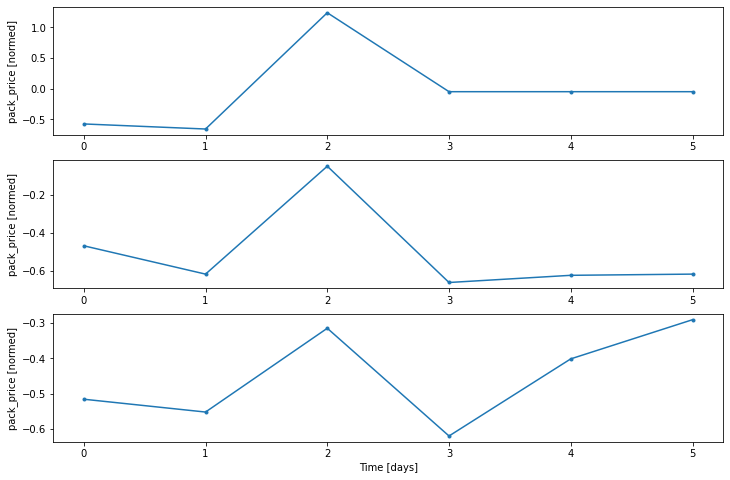

In [ ]:
w2.plot(plot_col="pack_price")

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=33,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(example_inputs)

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (33, 6, 3)
Labels shape (batch, time, features): (33, 1, 1)


In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['weight_kilograms_final'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['weight_kilograms_final']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (33, 1, 3)
Labels shape (batch, time, features): (33, 1, 1)


In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices["weight_kilograms_final"])

In [ ]:
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
single_step_window.val,single_step_window.test

(<MapDataset shapes: ((None, 1, 3), (None, 1, 1)), types: (tf.float32, tf.float32)>,
 <MapDataset shapes: ((None, 1, 3), (None, 1, 1)), types: (tf.float32, tf.float32)>)

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, verbose=1)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=1)

5/5 [==============================] - 0s 2ms/step - loss: 4.0561 - mean_absolute_error: 0.9858


In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['weight_kilograms_final'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['weight_kilograms_final']

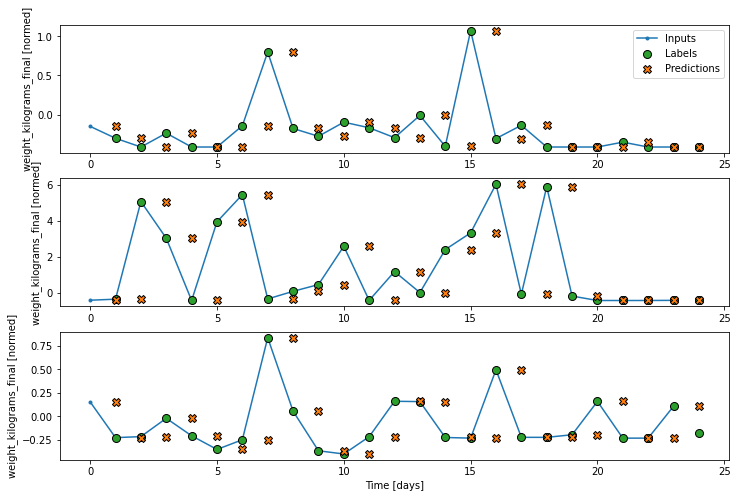

In [ ]:
wide_window.plot(baseline)

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (33, 1, 3)
Output shape: (33, 1, 1)


In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
22/22 [==============================] - 2s 53ms/step - loss: 1.5429 - mean_absolute_error: 0.5240 - val_loss: 4.5027 - val_mean_absolute_error: 1.2697
Epoch 2/20
22/22 [==============================] - 0s 9ms/step - loss: 1.1550 - mean_absolute_error: 0.4810 - val_loss: 4.4046 - val_mean_absolute_error: 1.2545
Epoch 3/20
22/22 [==============================] - 0s 9ms/step - loss: 1.4540 - mean_absolute_error: 0.5083 - val_loss: 4.2976 - val_mean_absolute_error: 1.2371
Epoch 4/20
22/22 [==============================] - 0s 9ms/step - loss: 1.4311 - mean_absolute_error: 0.5219 - val_loss: 4.2001 - val_mean_absolute_error: 1.2209
Epoch 5/20
22/22 [==============================] - 0s 9ms/step - loss: 1.2892 - mean_absolute_error: 0.4972 - val_loss: 4.1200 - val_mean_absolute_error: 1.2076
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 1.3403 - mean_absolute_error: 0.4833 - val_loss: 4.0404 - val_mean_absolute_error: 1.1944
Epoch 7/20
22/22 [=========

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (33, 24, 3)
Output shape: (33, 24, 1)


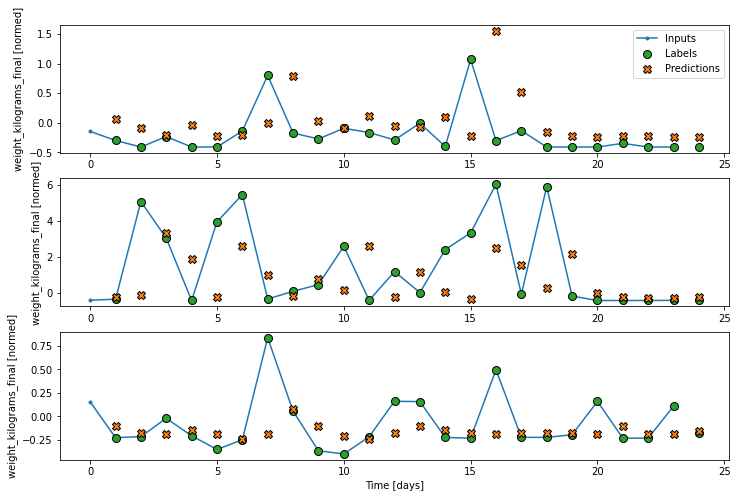

In [ ]:
wide_window.plot(linear)

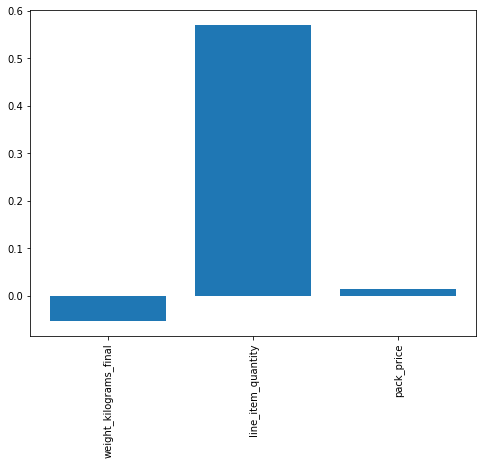

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)